In [1]:
import pandas as pd
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

import testzd as zd

# Investigate whether or not a strategy is zero determinant.

In [1], given a match between 2 memory one strategies the concept of Zero Determinant strategies is introduced. This result showed that a player $p\in\mathbb{R}^4$ against a player $q\in\mathbb{R}^4$ could force a linear relationship between the scores.

Assuming the following:

- The utilities for player $p$: $S_x = (R, S, T, P)$ and for player $q$: $S_y = (R, T, S, P)$.
- The normalised long run score for player $p$: $s_x$ and for player $q$: $s_y$.
- Given $p=(p_1, p_2, p_3, p_4)$ a transformed (but equivalent) vector: $\tilde p=(p_1 - 1, p_2 - 1, p_3, p_4)$, similarly: $\tilde q=(1 - q_1, 1 - q_2, q_3, q_4)$

The main result of [1] is that:

if $\tilde p = \alpha S_x + \beta S_y + \gamma 1$ **or** if $\tilde q = \alpha S_x + \beta S_y + \gamma 1$ then:

$$
\alpha s_x + \beta s_y + \gamma 1 = 0
$$

where $\alpha, \beta, \gamma \in \mathbb{R}$

The question arises:

**Given a strategy $p$, is it a zero determinant strategy?**

This is equivalent to finding $\alpha, \beta, \gamma \in \mathbb{R}$ such that $\tilde p = \alpha S_x + \beta S_y + \gamma 1$.

Recall that $\tilde p, S_x, S_y, 1\in\mathbb{R}^{4\times 1}$ so this corresponds to a linear system of 4 equations on three variables.

$$\tilde p=Mx$$

Where:

$$
M = \begin{pmatrix}S_x, S_y, 1\end{pmatrix}\in\mathbb{R}^{4\times 3}
$$

As an example consider the `extort-2` strategy defined in [2]. This is given by:

$$p=(8/9, 1/2, 1/3, 0)$$

it is defined to ensure:

$$
\begin{aligned}
\alpha s_x - P &= 2(s_y - P)\\
\alpha s_x - 2s_y + P&=0\\
\end{aligned}
$$

Let us solve $Mx=\tilde p$

In [2]:
R, S, T, P = sym.S(3), sym.S(0), sym.S(5), sym.S(1)

tilde_p = sym.Matrix([sym.S(8) / 9 - 1, sym.S(1) / 2 - 1, sym.S(1) / 3, sym.S(0)])
M = sym.Matrix([[R, R, 1], 
                [S, T, 1],
                [T, S, 1], 
                [P, P, 1]])

In [3]:
system = (M, tilde_p)
symbols = sym.symbols("alpha, beta, gamma")
sym.linsolve(system, symbols)

{(1/18, -1/9, 1/18)}

This gives $\alpha = 1 / 18$, $\beta = -1/9$ and $\gamma = 1 / 18$ which ensures:

$$
1/18 s_x -1/9 s_y + 1/18 = 0
$$

multiplying this by 18 gives:


$$
s_x -2 s_y + 1 = 0
$$

which is the relationship described above.

Note that in practice, a vector $p$ might not be defined exactly: indeed it could be measured from observation. Thus: $p\notin\mathbb{Q}^{4\times 1}$ but $p\in\mathbb{R}^{4\times 1}$. As such that linear equations may no longer have exact solutions and/or indeed have no solutions at all as $M$ is not a square matrix.

A practical approach to checking if a strategy is ZD or not makes use of the continuity of the determinant of a matrix. As the calculation of a matrix is a linear combination of its elements, a matrix with determinant "almost" zero is close to a matrix that has zero determinant.

## $\epsilon$-ZD strategies

We define:

$$\bar M ^{(i)} = M_{(i; i)}$$

The matrix $\bar M ^{(i)}\in\mathbb{R}^{3\times 3}$ is the matrix $M$ with the $i$th row removed.

Similarly:

$$\bar p^{(i)} = \tilde p_{(i)}$$

The vector $\bar p^{(i)}\in\mathbb{R}^{3\times 1}$ is the vector $\tilde p$ with the $i$th element removed.

Solving 

$$\bar M ^{(i)} x^{(i)} = \bar p^{(i)}$$ 

gives $\bar x^{(i)}$ and if $\min _{1\leq i\leq 4}|M_i\bar x^{(i)} - \tilde p_i| < \epsilon$ for some $\epsilon > 0$ then $p$ is $\epsilon$-ZD.

Thus if $\epsilon$-ZD are strategies for which values of $\alpha, \beta, \gamma$ can be found that make the strategy "close" to being a ZD strategy.

Let us confirm that `Extort-2` is $\epsilon$-ZD with $\epsilon=10 ^ {-7}$:

In [4]:
p = np.array([8 / 9, 1 / 2, 1 / 3, 0])
zd.is_epsilon_ZD(p)

True

Note that the following vector is not:

$$p = (8 / 9, 1, 1 / 3, 0)$$

In [5]:
zd.is_epsilon_ZD(np.array([8 / 9, 1, 1 / 3, 0]))

False

## Empirical observation

Let us consider the latest tournament of the Axelrod project: awaiting data collection.

## Evaluate the Press and Dyson tournament

The definition of an $\epsilon$-ZD strategies also allows for a measure of how close to a ZD strategy does a strategy actually play. A linear search over $\mathbb{R}_{\geq 0}$ finding the lowest possible value of $\epsilon$ for which a given strategy is $\epsilon$-ZD gives this.

In [31]:
dfs = {key: pd.read_csv(f"./data/stewart_plotkin_tournament/behaviour/{key}/main.csv") 
       for key in ["std", "noisy", "probend"]}

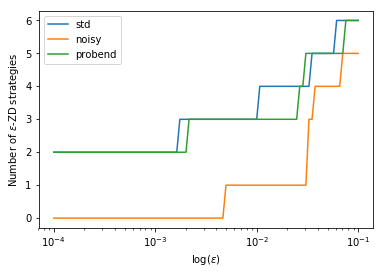

In [32]:
fig = plt.figure()
ax = plt.gca()

for key, df in dfs.items():
    ax.plot(df["epsilon"], df["counts"], label=key);
    ax.set_xscale('log')
    
plt.xlabel("$\log(\epsilon)$")
plt.ylabel(f"Number of $\epsilon$-ZD strategies")
plt.legend()
plt.show();

In [33]:
df.columns

Index(['Unnamed: 0', 'epsilon', 'counts', 'five_percent_quantile_ranks',
       'min_ranks', 'median_ranks', 'ninetyfive_percent_quantile_ranks',
       'max_ranks', 'min_score_per_turn',
       'five_percent_quantile_score_per_turn', 'mean_score_per_turn',
       'ninetyfive_percent_quantile_score_per_turn', 'max_score_per_turn',
       'min_number_of_wins', 'five_percent_quantile_number_of_wins',
       'median_number_of_wins', 'ninetyfive_percent_quantile_number_of_wins',
       'max_number_of_wins', 'min_cooperation_rate',
       'five_percent_quantile_cooperation_rate', 'mean_cooperation_rate',
       'ninetyfive_percent_quantile_cooperation_rate', 'max_cooperation_rate'],
      dtype='object')

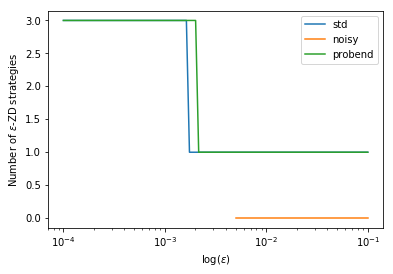

In [36]:
fig = plt.figure()
ax = plt.gca()

for key, df in dfs.items():
    ax.plot(df["epsilon"], df["min_ranks"], label=key);
    ax.set_xscale('log')
    
plt.xlabel("$\log(\epsilon)$")
plt.ylabel(f"Number of $\epsilon$-ZD strategies")
plt.legend()
plt.show();

In [37]:
matrices = {key: np.loadtxt(f"./data/stewart_plotkin_tournament/pairwise_epsilon/{key}/main.csv") 
            for key in ["std", "noisy", "probend"]}

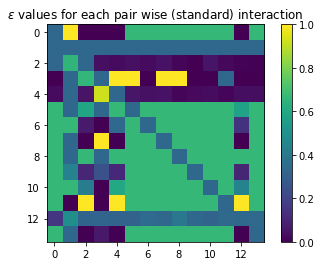

In [38]:
plt.imshow(matrices["std"])
plt.title("$\epsilon$ values for each pair wise (standard) interaction")
plt.colorbar();

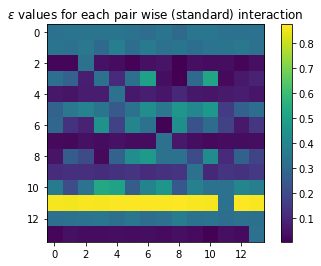

In [39]:
plt.imshow(matrices["noisy"])
plt.title("$\epsilon$ values for each pair wise (noisy) interaction")
plt.colorbar();

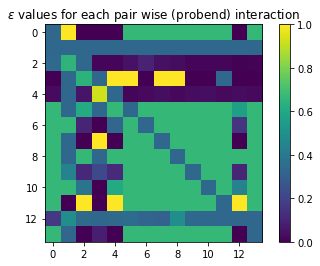

In [40]:
plt.imshow(matrices["probend"])
plt.title("$\epsilon$ values for each pair wise (probend) interaction")
plt.colorbar();

## References

[1] Press, William H., and Freeman J. Dyson. "Iterated Prisoner’s Dilemma contains strategies that dominate any evolutionary opponent." Proceedings of the National Academy of Sciences 109.26 (2012): 10409-10413

[2] Stewart, Alexander J., and Joshua B. Plotkin. "Extortion and cooperation in the Prisoner’s Dilemma." Proceedings of the National Academy of Sciences 109.26 (2012): 10134-10135.